## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [12]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [15]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5

In [18]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.6165 - accuracy: 0.7799 - val_loss: 1.8577 - val_accuracy: 0.4932
Epoch 50/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.6061 - accuracy: 0.7826 - val_loss: 1.9226 - val_accuracy: 0.4859
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.0199 - accuracy: 0.6405 - val_loss: 1.4578 - val_accuracy: 0.5002
Epoch 48/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.0104 - accuracy: 0.6447 - val_loss: 1.5173 - val_accuracy: 0.4931
Epoch 49/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.0027 - accuracy: 0.6455 - val_loss: 1.5296 - val_accuracy: 0.4966
Epoch 50/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9903 - accuracy: 0.6528 - val_loss: 1.4293 - val_accuracy: 0.5154
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5790 - accuracy: 0.4495 - val_loss: 1.5922 - val_accuracy: 0.4475
Epoch 46/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5744 - accuracy: 0.4494 - val_loss: 1.5866 - val_accuracy: 0.4399
Epoch 47/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.5698 - accuracy: 0.4506 - val_loss: 1.5805 - val_accuracy: 0.4478
Epoch 48/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5656 - accuracy: 0.4537 - val_loss: 1.5758 - val_accuracy: 0.4507
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5620 - accuracy: 0.4535 - val_loss: 1.5728 - val_accuracy: 0.4514
Epoch 50/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5573 - accuracy: 0.4574 - val_loss: 1.5692 - val_accuracy: 0.4527
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.9520 - accuracy: 0.3180 - val_loss: 1.9523 - val_accuracy: 0.3155
Epoch 44/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.9484 - accuracy: 0.3201 - val_loss: 1.9487 - val_accuracy: 0.3164
Epoch 45/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.9448 - accuracy: 0.3210 - val_loss: 1.9453 - val_accuracy: 0.3179
Epoch 46/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.9413 - accuracy: 0.3227 - val_loss: 1.9418 - val_accuracy: 0.3183
Epoch 47/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.9380 - accuracy: 0.3235 - val_loss: 1.9385 - val_accuracy: 0.3214
Epoch 48/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.9346 - accuracy: 0.3262 - val_loss: 1.9353 - val_accuracy: 0.3211
Epoch 49/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.9314 - accuracy: 0.3270

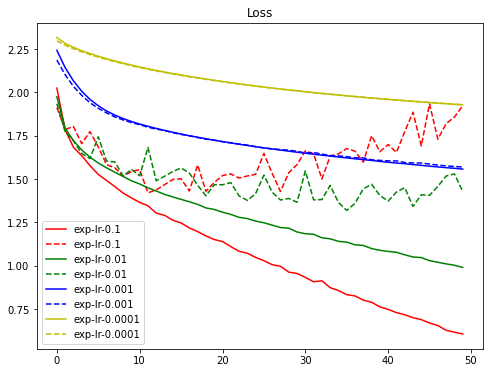

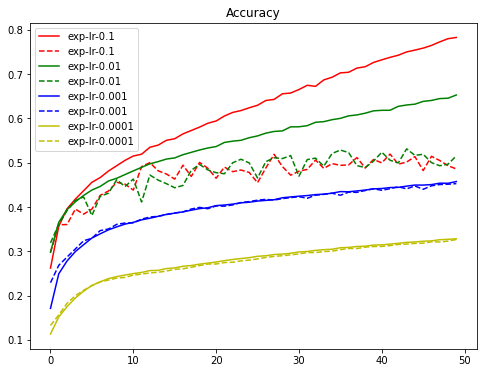

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()